# SEXction a 3

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Plotting style
sns.set_style('darkgrid')
sns.set_theme(font_scale=1.)

In [10]:
# Load the NanoNose dataset into X and y

# Name of the dataset
name_data_file = "heart_failure_clinical_records_dataset"

# Absolute path to the folder containing your CSV
data_folder = r"C:\Users\andre\Documents\GitHub\02452---Machine-Learning---Project\code\raw_data"

# Construct the full path
file_path = f"{data_folder}\\{name_data_file}.csv"

# Load the data
data = pd.read_csv(file_path, na_values=["?"])

In [ ]:
# Select features (all columns except target)
X = data.drop(columns=["DEATH_EVENT"])  # all features except the target

# Select target
y = data["DEATH_EVENT"]

# Check data shape
assert X.shape == (299,12), "There should be 299 samples and 12 features"
assert y.shape == (299,), "There should be 299 samples in the target variable"

The code below is not very good. The graph shows the PCs if we don't perform standardization on the data before applying PCA. Our features have very different ranges, and what happens is that the variables with higher variance will dominate PC1 and the others will become irrelevant. Therefore, this graph is not very relevant, except to show the importance of performing standardization.

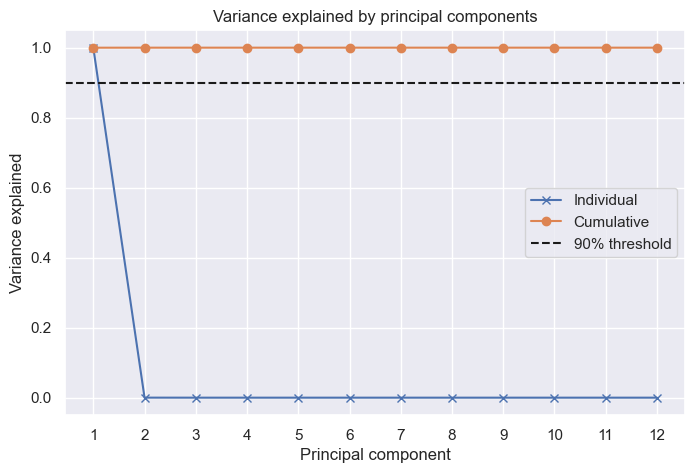

In [14]:
# Create and fit PCA
pca = PCA()
pca.fit(X)

# Extract principal components (V)
V = pca.components_.T

# Fraction of variance explained by each PC
rho = pca.explained_variance_ratio_


# Threshold for cumulative variance
threshold = 0.9


# Plot variance explained
plt.figure(figsize=(8,5))
plt.plot(range(1, len(rho) + 1), rho, "x-", label="Individual")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-", label="Cumulative")
plt.axhline(y=threshold, color="k", linestyle="--", label="90% threshold")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.xticks(range(1, len(rho) + 1))
plt.legend()
plt.grid(True)
plt.show()

The graph below is a lil nastier ;)

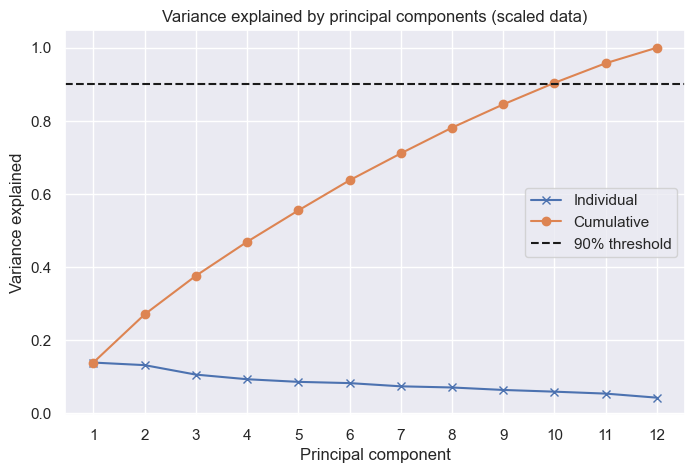

In [16]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# this is exactly the same as "X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)""

# PCA applied to standardized data
pca = PCA()
pca.fit(X_scaled)

# Compute fraction of variance explained
rho = pca.explained_variance_ratio_

# Plot
threshold = 0.9
plt.figure(figsize=(8,5))
plt.plot(range(1, len(rho)+1), rho, "x-", label="Individual")
plt.plot(range(1, len(rho)+1), np.cumsum(rho), "o-", label="Cumulative")
plt.axhline(y=threshold, color="k", linestyle="--", label="90% threshold")
plt.title("Variance explained by principal components (scaled data)")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.xticks(range(1, len(rho)+1))
plt.legend()
plt.grid(True)
plt.show()


Não sei fará sentido fazer o gráfico obtido na Task 2.4 do exercise 3. No caso da aula com apenas duas PCs já se tinha uma cumulative variance de quase 0.9, enqunato o nosso caso está bastante longe disso. De qualquer forma está o gráfico aqui em baixo. Atenção que a este ponto já estou a trabalhar só com X_scaled. Se trocarem "X_scaled" por "X" na linha 7 vão ver o gráfico sem standardization. fica bem podre!!!!

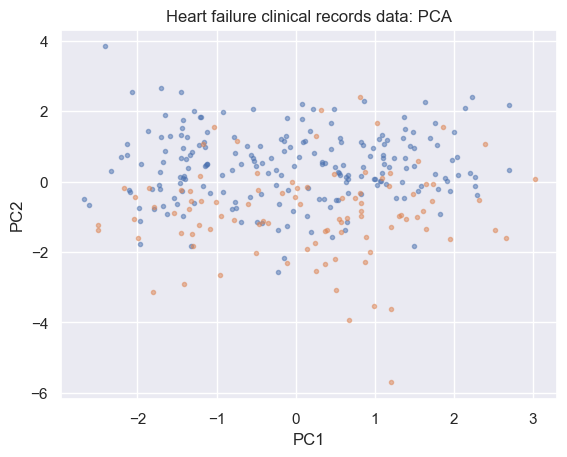

In [19]:
PC_idxs = [0, 1]  
unique_classes = np.unique(y) 

# Project the data onto the first two principal components and plot, colored by their fluid type.

# Project X to the subspace
B = pca.transform(X_scaled)

# Plot PCA of the data
fig = plt.figure()
plt.title("Heart failure clinical records data: PCA")
# Plot the data projected onto the principal components, colored by their fluid type
for fluid_type in unique_classes:
    # Construct a mask for the current fluid type
    mask = (y == fluid_type)
    # Plot the data for the current fluid type
    plt.plot(B[mask, PC_idxs[0]], B[mask, PC_idxs[1]], ".", alpha=0.5)

# Set axis labels
plt.xlabel(f"PC{PC_idxs[0] + 1}")
plt.ylabel(f"PC{PC_idxs[1] + 1}")
plt.show()